假設從 2010.01.01 開始，你每個月持續有 USD$1000 資金，

(1) 你都不管它，只放在銀行，到了 2020.01.01 你的財產=?

(2) 你固定選擇 Apple (AAPL) 公司作為買股票的對象，到了 2020.01.01 你的財產 =?

In [1]:
#(1)
def Money(input_money,annual_rate, year):
    month=int(year*12)
    
    month_rate=annual_rate/12
    total=input_money*(1+month_rate)*((1+month_rate)**month-1)/month_rate
    return total

In [2]:
a=Money(1000, 0.008, 10) #a代表從2010.01.01到2019.01.01存的錢加利息，還沒加2020.01.01存的1000元
print("USD",a)

USD 124970.54804900131


In [3]:
sum=a+1000
print("本利和:USD",sum)

本利和:USD 125970.54804900131


In [4]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget C:\Users\RITA\Documents\訊號\thinkdsp.py

In [5]:
from thinkdsp import decorate

In [6]:
if not os.path.exists('AAPL.csv'):
    !wget C:\Users\RITA\Documents\訊號\AAPL.csv

In [7]:
import pandas as pd

df = pd.read_csv('AAPL.csv', 
                 parse_dates=[0])
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-01,7.622500,7.699643,6.794643,6.859286,5.898319,15168994400
1,2010-02-01,6.870357,7.327500,6.816071,7.307857,6.284047,10776080000
2,2010-03-01,7.348214,8.481429,7.337500,8.392857,7.217041,12154172800
3,2010-04-01,8.478929,9.730714,8.312500,9.324643,8.018287,12367129600
4,2010-05-01,9.422857,9.567143,7.116071,9.174286,7.888996,18082654800
...,...,...,...,...,...,...,...
115,2019-08-01,53.474998,54.507500,48.145000,52.185001,51.224396,2724326400
116,2019-09-01,51.607498,56.605000,51.055000,55.992500,55.170628,2170268400
117,2019-10-01,56.267502,62.437500,53.782501,62.189999,61.277161,2433210800
118,2019-11-01,62.384998,67.000000,62.290001,66.812500,65.831795,1793326000


In [8]:
ys = df['Close']
ts = df.index

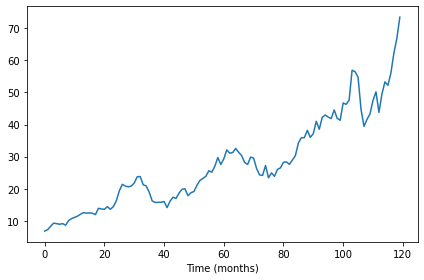

In [9]:
from thinkdsp import Wave

wave = Wave(ys, ts, framerate=1)
wave.plot()
decorate(xlabel='Time (months)')

In [10]:
#(2)
def Money2(input_money2,annual_rate2,month2):
    month_rate2=annual_rate2/12
    total2=input_money2*(1+month_rate2)*((1+month_rate2)**month2-1)/month_rate2
    return total2

In [11]:
#2010.01.01 Open=7.6225
#2020.01.01 Close=73.412498
#假設2010.01.01把要存入銀行的1000拿約一半投資股票，買130股
#因為2010.01.01 Open=7.6225，所以剩下的錢=1000-7.6225*130
start_input_money = 1000 - 7.6225*130
first_month_value_money = Money2(start_input_money,0.008,1) #start_input_money存入銀行後一個月的利息加start_input_money的錢
print("USD",first_month_value_money)

USD 9.081049999999045


In [12]:
#value是2010.02.01開始每個月存1000到銀行

value = Money2(first_month_value_money+1000, 0.008, 1) #value代表2010.03.01當時有的錢，還沒加2010.03.01要存入的1000元
for i in range(118):
    value = Money2(value+1000, 0.008, 1)
print("USD",value)

USD 123897.12042305213


In [13]:
#加股票的錢
b=value+1000
stock=b+73.412498*130
print("USD",stock)

USD 134440.7451630521
